In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras

In [5]:
# dataset_path = keras.utils.get_file('auto-mpg.data',
#                                   'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')

32768/30286 [================================] - 0s 14us/step


In [7]:
dataset_path = '../data/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
               'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                         na_values='?', comment='\t',
                         sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()

In [8]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [9]:
# 统计空白数据
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [10]:
# 删除空白数据
dataset = dataset.dropna()
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [11]:
# 处理类别类型数据 - origin 代表了1，2，3分布产地美国，欧洲，日本
origin = dataset.pop('Origin')
# 加入3列
dataset['USA'] = (origin == 1) * 1.0
dataset['Europe'] = (origin == 2) * 1.0
dataset['Japan'] = (origin == 3) * 1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [12]:
# 切分训练集和测试集
train_dataset = dataset.sample(frac=0.8, random_state=0)
train_dataset.shape

(314, 10)

In [13]:
test_dataset = dataset.drop(train_dataset.index)
test_dataset.shape

(78, 10)

In [14]:
dataset.shape

(392, 10)

In [15]:
# 标签列
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')
train_labels.shape, test_labels.shape

((314,), (78,))

In [16]:
train_dataset.shape, test_dataset.shape

((314, 9), (78, 9))

In [21]:
# 查看特征项的统计数据
train_stats = train_dataset.describe()
train_stats 

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.624204,0.178344,0.197452
std,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.485101,0.383413,0.398712
min,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,1.000000,0.000000,0.000000
max,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [22]:
# 特征项统计数据转置
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [23]:
train_stats['mean']

Cylinders          5.477707
Displacement     195.318471
Horsepower       104.869427
Weight          2990.251592
Acceleration      15.559236
Model Year        75.898089
USA                0.624204
Europe             0.178344
Japan              0.197452
Name: mean, dtype: float64

In [28]:
train_dataset.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,4,90.0,75.0,2125.0,14.5,74,1.0,0.0,0.0
282,4,140.0,88.0,2890.0,17.3,79,1.0,0.0,0.0
69,8,350.0,160.0,4456.0,13.5,72,1.0,0.0,0.0
378,4,105.0,63.0,2125.0,14.7,82,1.0,0.0,0.0
331,4,97.0,67.0,2145.0,18.0,80,0.0,0.0,1.0


In [27]:
t = train_dataset - train_stats['mean']
t.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,-1.477707,-105.318471,-29.869427,-865.251592,-1.059236,-1.898089,0.375796,-0.178344,-0.197452
282,-1.477707,-55.318471,-16.869427,-100.251592,1.740764,3.101911,0.375796,-0.178344,-0.197452
69,2.522293,154.681529,55.130573,1465.748408,-2.059236,-3.898089,0.375796,-0.178344,-0.197452
378,-1.477707,-90.318471,-41.869427,-865.251592,-0.859236,6.101911,0.375796,-0.178344,-0.197452
331,-1.477707,-98.318471,-37.869427,-845.251592,2.440764,4.101911,-0.624204,-0.178344,0.802548


In [29]:
# 标准化数据集
def norm(x):
    # 减去每个字段的均值，并除以每个字段的标准差
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [31]:
normed_train_data.values

array([[-0.86934805, -1.0094591 , -0.78405236, ...,  0.77467638,
        -0.46514837, -0.49522541],
       [-0.86934805, -0.53021786, -0.4428111 , ...,  0.77467638,
        -0.46514837, -0.49522541],
       [ 1.48388718,  1.48259536,  1.44714046, ...,  0.77467638,
        -0.46514837, -0.49522541],
       ...,
       [-0.86934805, -0.83693225, -0.31156447, ..., -1.28675059,
        -0.46514837,  2.01285166],
       [-0.86934805, -1.07655287, -1.15154294, ..., -1.28675059,
        -0.46514837,  2.01285166],
       [-0.86934805, -0.84651708, -0.49530976, ..., -1.28675059,
         2.143005  , -0.49522541]])

In [30]:
# 构建数据集
train_db = tf.data.Dataset.from_tensor_slices((normed_train_data.values, train_labels.values))

In [32]:
# 随机打散，批量化
train_db = train_db.shuffle(100).batch(32)
train_db

<BatchDataset shapes: ((None, 9), (None,)), types: (tf.float64, tf.float64)>

In [36]:
train_labels.head()

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
Name: MPG, dtype: float64

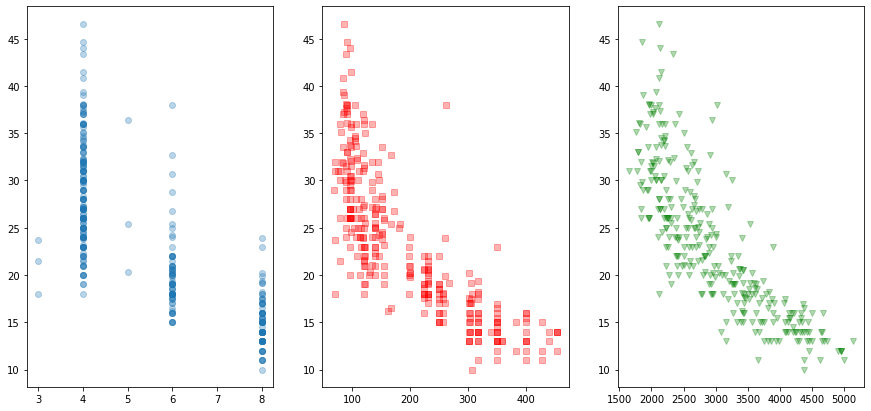

In [58]:
# 数据集中的关系

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15,7))
axes[0].plot(train_dataset.Cylinders, train_labels, 'o', label='Cylinders', alpha=0.3)
axes[1].plot(train_dataset.Displacement, train_labels, 'rs', label='Displacement', alpha=0.3)
axes[2].plot(train_dataset.Weight, train_labels, 'gv', label='Weight', alpha=0.3)

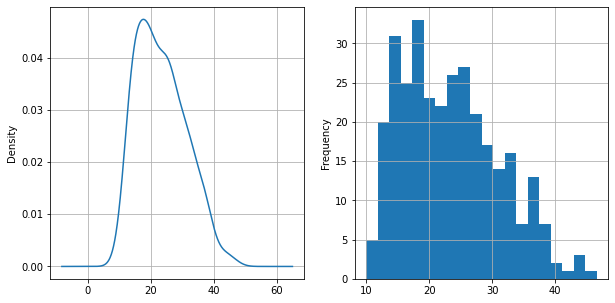

In [77]:
# MPG的分布
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# 密度图
train_labels.plot(kind='kde', ax=axes[0], grid=True)
# 频率图
train_labels.plot(kind='hist', bins=20, ax=axes[1], grid=True)

In [78]:
# 搭建网络

from tensorflow.keras import layers

class Network(keras.Model):
    
    # 回归网络模型
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = layers.Dense(64, activation='relu')
        self.fc2 = layers.Dense(64, activation='relu')
        self.fc3 = layers.Dense(1)
        
    def call(self, inputs, training=None, mask=None):
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [79]:
# 定义网络
model = Network()

# 构建网络，4是batch数量，9是特征维度
model.build(input_shape=(4, 9))

# 打印网络信息
model.summary()

Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  640       
_________________________________________________________________
dense_1 (Dense)              multiple                  4160      
_________________________________________________________________
dense_2 (Dense)              multiple                  65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [80]:
# 创建优化器
optimizer = tf.keras.optimizers.RMSprop(0.001) # 学习率 0.001

In [83]:
from tensorflow.keras import losses

# 训练模型
for epoch in range(200):
    for step, (x, y) in enumerate(train_db):
        # 梯度记录器
        with tf.GradientTape() as tape:
            # 获取模型输出
            out = model(x)
            # 计算损失（均方误差）
            loss = tf.reduce_mean(losses.MSE(y, out))
            # 绝对平均误差损失
            mae_loss = tf.reduce_mean(losses.MAE(y, out))
        
        # 打印损失
        if step % 10 == 0:
            print(epoch, step, float(loss))
        
        # 计算梯度
        grads = tape.gradient(loss, model.trainable_variables)
        # 更新梯度
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

0 0 592.5615234375
1 0 510.53082275390625
2 0 485.7128601074219
3 0 483.74420166015625
4 0 421.8656311035156
5 0 289.056884765625
6 0 232.5293731689453
7 0 202.58102416992188
8 0 175.18292236328125
9 0 171.56228637695312
10 0 125.4312515258789
11 0 135.09375
12 0 103.38252258300781
13 0 102.50819396972656
14 0 79.71107482910156
15 0 67.7919692993164
16 0 81.8006591796875
17 0 65.98399353027344
18 0 69.06198120117188
19 0 73.30614471435547
20 0 75.29283142089844
21 0 73.75311279296875
22 0 62.00944519042969
23 0 72.6742935180664
24 0 63.196685791015625
25 0 80.96232604980469
26 0 69.10713195800781
27 0 77.72459411621094
28 0 56.65007019042969
29 0 68.89141845703125
30 0 71.28070831298828
31 0 60.678592681884766
32 0 48.28052520751953
33 0 66.39490509033203
34 0 53.8695068359375
35 0 70.58616638183594
36 0 63.467063903808594
37 0 72.52731323242188
38 0 58.550445556640625
39 0 52.116783142089844
40 0 62.24394989013672
41 0 59.57503890991211
42 0 53.395530700683594
43 0 68.39387512207031
4

In [86]:
model.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(9, 64) dtype=float32, numpy=
 array([[ 0.0852074 , -0.30216897,  0.18356459, -0.21204953,  0.04488277,
          0.16265862, -0.03179684, -0.15888311, -0.04887028, -0.00363425,
         -0.16241774, -0.0617095 ,  0.08054546,  0.26900855,  0.0880639 ,
         -0.20296304, -0.3190109 ,  0.33104968, -0.2006468 ,  0.09038795,
         -0.32053563, -0.23358393, -0.07257443,  0.16715056,  0.15880287,
          0.1405257 , -0.07071481,  0.04322089,  0.23558037, -0.10645651,
          0.26936907, -0.14185044,  0.06749469, -0.19341007, -0.22356011,
          0.22990651,  0.1366198 , -0.17397478,  0.24982287,  0.23140664,
          0.11767048, -0.03835526,  0.09990071, -0.22027051,  0.06182099,
         -0.16615212,  0.10967098, -0.04802636,  0.09820044, -0.14660059,
          0.26578888,  0.23704422, -0.08144505,  0.07633895, -0.16754478,
         -0.33367768, -0.34676787,  0.19842926, -0.11298583,  0.22609715,
          0.23604134,  0.0470325 ,  0.1194693